In [33]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport data.read_data
%aimport models.train_model
%aimport features.build_features
%aimport visualization.visualize
from data.read_data import read_data, get_stopwords
from models.train_model import split_train, score_function, get_fasttext, model_ridge, model_xgb
from features.build_features import get_vec
from visualization.visualize import plot_roc, plot_scatter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load fasttext model

In [2]:
model_fasttext = get_fasttext()

* Test fasttext model:
    * (femme + roi) - homme

In [5]:
result = model_fasttext.most_similar(positive=['femme', 'roi'], negative=['homme'], topn=1)
print(result)

[('reine', 0.671850860118866)]


In [3]:
stopwords = get_stopwords()

In [4]:
train = read_data()
y = train['Target']

In [5]:
train.head()

,ID,review_content,review_title,review_stars,product,Target
0,0,En appelant un acheteur pour demander si l'écr...,La Police s'inscrit en acheteur privé sur Pric...,5,2fbb619e3606f9b7c213e858a109cda771aa2c47ce50d5...,0
1,1,"Alors, là, on a affaire au plus grand Navet ja...",Chef D'Oeuvre Absolu en vue...,5,7b56d9d378d9e999d293f301ac43d044cd7b4786d09afb...,1
2,2,Effet garanti sur la terrase. Ils donnent immé...,Effet garanti sur la terrase. Ils donnent immé...,3,7b37bf5dcb2fafd9229897910318a7dfa11a04ca36893c...,0
3,3,tres bon rapport qualite prix tre pratique en ...,bon produit,4,77d2dbd504b933ab3aaf7cb0cd81c22f7c3549012f4f88...,1
4,4,Ordinateur de bureau trés bien pour quelqu'un ...,Apple Power MAC G4,3,f574512e7d2dd1dd73c7f8f804bf16f14c932c5651a01b...,1


In [7]:
xtrain = get_vec(train['review_content'].values, model_fasttext, stopwords)

In [9]:
X_train, X_test, y_train, y_test = split_train(xtrain, y, 0.2)

## Ridge regression

In [12]:
model_rdg = model_ridge(X_train, y_train)
preds = model_rdg.predict(X=X_test)
score_function(y_test, preds)

0.67727333162785097

## Xgboost

In [13]:
model_xgboost = model_xgb(X_train, y_train)
preds = model_xgboost.predict_proba(X_test)
preds1 = preds[:,1]
score_function(y_test, preds1)

# 2D  representation

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(xtrain)

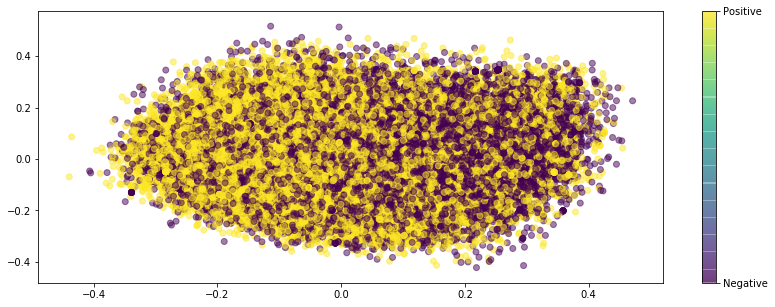

In [31]:
plot_scatter(values=result, colors=train['Target'].values, 
             ticks=[0,1], ticks_labels=['Negative', 'Positive'])

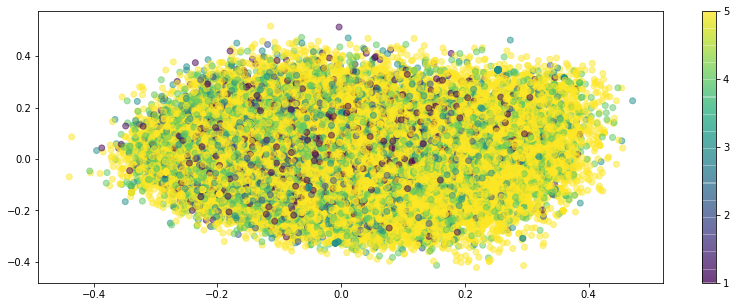

In [32]:
plot_scatter(values=result, colors=train['review_stars'].values, 
             ticks=[1, 2, 3, 4, 5], ticks_labels=['1', '2', '3', '4', '5'])